In [72]:
import pandas as pd
from sklearn import preprocessing
import numpy as np

In [2]:
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

In [3]:
target = train["Transported"]
X = train.drop(columns=["Transported"])

In [4]:
len(X) + len(test)

12970

In [5]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


# EDA Exploratory Data Analysis

File and Data Field Descriptions

## train

**train.csv** - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.

 - **PassengerId** - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

 - **HomePlanet** - The planet the passenger departed from, typically their planet of permanent residence.

 - **CryoSleep** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

 - **Cabin** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

 - **Destination** - The planet the passenger will be debarking to.

 - **Age** - The age of the passenger.

 - **VIP** - Whether the passenger has paid for special VIP service during the voyage.
RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

 - **Name** - The first and last names of the passenger.
Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

## test

**test.csv** - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.

## submission

**sample_submission.csv** - A submission file in the correct format.

 - **PassengerId** - Id for each passenger in the test set.

 - **Transported** - The target. For each passenger, predict either True or False.

In [7]:
len(train.columns)

14

In [8]:
def transform_data(df):
    
    n_columns = len(df.columns)
    
    #if(n_columns == 14):
    #    y = df["Transported"]
    #    df = df.drop(columns=["Transported"])
    #else:
    #    y = None
    
    # Cabin - The cabin number where the passenger is staying.
    # Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
    df[["cabin_deck","cabin_num","cabin_side"]] = df["Cabin"].str.split("/", expand=True)
    
    df["cabin_code"] = df["cabin_deck"]+df["cabin_num"]
    
    # PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is
    # travelling with and pp is their number within the group. People in a group are often family members, but not always.
    df[["group","subgroup"]] = df["PassengerId"].str.split("_",1, expand=True)
    
    # Name - The first and last names of the passenger.
    df[["first_name","last_name"]] = df["Name"].str.split(" ",1, expand=True)
    
    return df#, y

In [9]:
df = transform_data(train)

In [10]:
df = df.drop(columns=["PassengerId","Name","Cabin","first_name"])

In [11]:
#df2, k = transform_data(test)
#df = pd.concat([df,df2])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Destination   8511 non-null   object 
 3   Age           8514 non-null   float64
 4   VIP           8490 non-null   object 
 5   RoomService   8512 non-null   float64
 6   FoodCourt     8510 non-null   float64
 7   ShoppingMall  8485 non-null   float64
 8   Spa           8510 non-null   float64
 9   VRDeck        8505 non-null   float64
 10  Transported   8693 non-null   bool   
 11  cabin_deck    8494 non-null   object 
 12  cabin_num     8494 non-null   object 
 13  cabin_side    8494 non-null   object 
 14  cabin_code    8494 non-null   object 
 15  group         8693 non-null   object 
 16  subgroup      8693 non-null   object 
 17  last_name     8493 non-null   object 
dtypes: bool(1), float64(6), obje

In [13]:
df.nunique()

HomePlanet         3
CryoSleep          2
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Transported        2
cabin_deck         8
cabin_num       1817
cabin_side         2
cabin_code      4453
group           6217
subgroup           8
last_name       2217
dtype: int64

In [14]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [15]:
df = pd.get_dummies(df,columns=["HomePlanet","CryoSleep","Destination","VIP","Transported","cabin_side","cabin_deck"])

In [16]:
import seaborn as sns

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        8514 non-null   float64
 1   RoomService                8512 non-null   float64
 2   FoodCourt                  8510 non-null   float64
 3   ShoppingMall               8485 non-null   float64
 4   Spa                        8510 non-null   float64
 5   VRDeck                     8505 non-null   float64
 6   cabin_num                  8494 non-null   object 
 7   cabin_code                 8494 non-null   object 
 8   group                      8693 non-null   object 
 9   subgroup                   8693 non-null   object 
 10  last_name                  8493 non-null   object 
 11  HomePlanet_Earth           8693 non-null   uint8  
 12  HomePlanet_Europa          8693 non-null   uint8  
 13  HomePlanet_Mars            8693 non-null   uint8

In [18]:
df = df.drop(columns=["CryoSleep_False","VIP_False","Transported_False","cabin_num"])

In [19]:
df.nunique()

Age                            80
RoomService                  1273
FoodCourt                    1507
ShoppingMall                 1115
Spa                          1327
VRDeck                       1306
cabin_code                   4453
group                        6217
subgroup                        8
last_name                    2217
HomePlanet_Earth                2
HomePlanet_Europa               2
HomePlanet_Mars                 2
CryoSleep_True                  2
Destination_55 Cancri e         2
Destination_PSO J318.5-22       2
Destination_TRAPPIST-1e         2
VIP_True                        2
Transported_True                2
cabin_side_P                    2
cabin_side_S                    2
cabin_deck_A                    2
cabin_deck_B                    2
cabin_deck_C                    2
cabin_deck_D                    2
cabin_deck_E                    2
cabin_deck_F                    2
cabin_deck_G                    2
cabin_deck_T                    2
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        8514 non-null   float64
 1   RoomService                8512 non-null   float64
 2   FoodCourt                  8510 non-null   float64
 3   ShoppingMall               8485 non-null   float64
 4   Spa                        8510 non-null   float64
 5   VRDeck                     8505 non-null   float64
 6   cabin_code                 8494 non-null   object 
 7   group                      8693 non-null   object 
 8   subgroup                   8693 non-null   object 
 9   last_name                  8493 non-null   object 
 10  HomePlanet_Earth           8693 non-null   uint8  
 11  HomePlanet_Europa          8693 non-null   uint8  
 12  HomePlanet_Mars            8693 non-null   uint8  
 13  CryoSleep_True             8693 non-null   uint8

<AxesSubplot:>

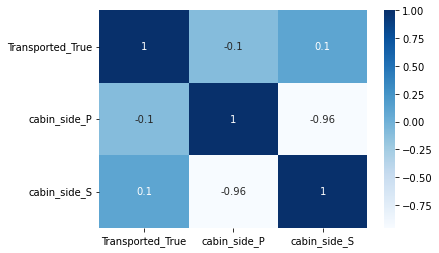

In [21]:
sns.heatmap(df[["Transported_True","cabin_side_P","cabin_side_S"]].corr(), cmap="Blues", annot=True)

<AxesSubplot:>

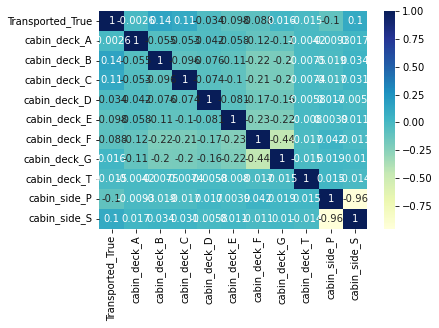

In [22]:
df2 = df[["Transported_True","cabin_deck_A","cabin_deck_B","cabin_deck_C","cabin_deck_D","cabin_deck_E","cabin_deck_F","cabin_deck_G","cabin_deck_T","cabin_side_P","cabin_side_S"]]

sns.heatmap(df2.corr(), cmap="YlGnBu", annot=True)

<AxesSubplot:>

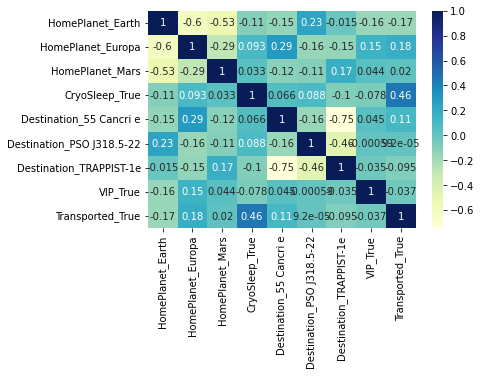

In [23]:
df3 = df[["HomePlanet_Earth","HomePlanet_Europa","HomePlanet_Mars","CryoSleep_True","Destination_55 Cancri e",
          "Destination_PSO J318.5-22","Destination_TRAPPIST-1e","VIP_True","Transported_True"]]

sns.heatmap(df3.corr(), cmap="YlGnBu", annot=True)

In [24]:
df_earth = df[df["HomePlanet_Earth"]==1]

In [25]:
df_earth = df_earth.reset_index()

In [26]:
df_earth2 = df_earth.groupby(by=["Destination_55 Cancri e","Destination_PSO J318.5-22","Destination_TRAPPIST-1e"]).count()

In [27]:
df_earth2["index"]

Destination_55 Cancri e  Destination_PSO J318.5-22  Destination_TRAPPIST-1e
0                        0                          0                            99
                                                    1                          3101
                         1                          0                           712
1                        0                          0                           690
Name: index, dtype: int64

<AxesSubplot:ylabel='Frequency'>

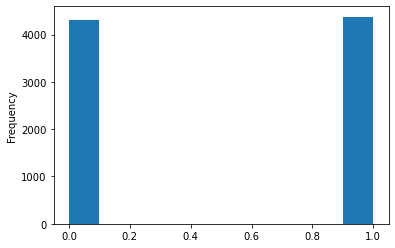

In [28]:
df["Transported_True"].plot.hist()

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
lr = LogisticRegression()

In [31]:
X = df.drop(columns=["Transported_True"])
y = df["Transported_True"]

In [32]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        8514 non-null   float64
 1   RoomService                8512 non-null   float64
 2   FoodCourt                  8510 non-null   float64
 3   ShoppingMall               8485 non-null   float64
 4   Spa                        8510 non-null   float64
 5   VRDeck                     8505 non-null   float64
 6   cabin_code                 8494 non-null   object 
 7   group                      8693 non-null   object 
 8   subgroup                   8693 non-null   object 
 9   last_name                  8493 non-null   object 
 10  HomePlanet_Earth           8693 non-null   uint8  
 11  HomePlanet_Europa          8693 non-null   uint8  
 12  HomePlanet_Mars            8693 non-null   uint8  
 13  CryoSleep_True             8693 non-null   uint8

In [33]:
X = X.drop(columns=["cabin_code","group","subgroup","last_name"])

In [34]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        8514 non-null   float64
 1   RoomService                8512 non-null   float64
 2   FoodCourt                  8510 non-null   float64
 3   ShoppingMall               8485 non-null   float64
 4   Spa                        8510 non-null   float64
 5   VRDeck                     8505 non-null   float64
 6   HomePlanet_Earth           8693 non-null   uint8  
 7   HomePlanet_Europa          8693 non-null   uint8  
 8   HomePlanet_Mars            8693 non-null   uint8  
 9   CryoSleep_True             8693 non-null   uint8  
 10  Destination_55 Cancri e    8693 non-null   uint8  
 11  Destination_PSO J318.5-22  8693 non-null   uint8  
 12  Destination_TRAPPIST-1e    8693 non-null   uint8  
 13  VIP_True                   8693 non-null   uint8

In [35]:
X["Age"] = X["Age"].fillna(X["Age"].mean())
X["RoomService"] = X["RoomService"].fillna(X["RoomService"].mean())
X["FoodCourt"] = X["FoodCourt"].fillna(X["FoodCourt"].mean())
X["ShoppingMall"] = X["ShoppingMall"].fillna(X["ShoppingMall"].mean())
X["Spa"] = X["Spa"].fillna(X["Spa"].mean())
X["VRDeck"] = X["VRDeck"].fillna(X["VRDeck"].mean())

<AxesSubplot:>

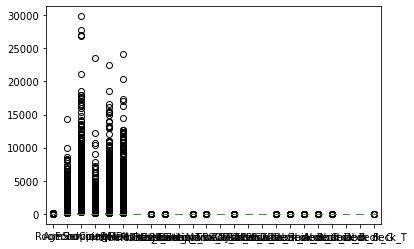

In [36]:
X.plot.box()

In [37]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        8693 non-null   float64
 1   RoomService                8693 non-null   float64
 2   FoodCourt                  8693 non-null   float64
 3   ShoppingMall               8693 non-null   float64
 4   Spa                        8693 non-null   float64
 5   VRDeck                     8693 non-null   float64
 6   HomePlanet_Earth           8693 non-null   uint8  
 7   HomePlanet_Europa          8693 non-null   uint8  
 8   HomePlanet_Mars            8693 non-null   uint8  
 9   CryoSleep_True             8693 non-null   uint8  
 10  Destination_55 Cancri e    8693 non-null   uint8  
 11  Destination_PSO J318.5-22  8693 non-null   uint8  
 12  Destination_TRAPPIST-1e    8693 non-null   uint8  
 13  VIP_True                   8693 non-null   uint8

In [38]:
scaler = preprocessing.StandardScaler().fit(X)

In [39]:
X_scaled = scaler.transform(X)

In [40]:
X_scaled

array([[ 0.70943692, -0.34058987, -0.28731404, ..., -0.68821479,
        -0.64589698, -0.02398972],
       [-0.33671733, -0.1753636 , -0.28166908, ...,  1.45303474,
        -0.64589698, -0.02398972],
       [ 2.03456565, -0.27540886,  1.95561575, ..., -0.68821479,
        -0.64589698, -0.02398972],
       ...,
       [-0.1972301 , -0.34058987, -0.28731404, ..., -0.68821479,
         1.54823451, -0.02398972],
       [ 0.2212316 , -0.34058987,  0.37063712, ..., -0.68821479,
        -0.64589698, -0.02398972],
       [ 1.05815501, -0.14959437,  2.65308161, ..., -0.68821479,
        -0.64589698, -0.02398972]])

In [44]:
from train_test_split import tt_split

In [45]:
X_train, X_test, y_train, y_test = tt_split(X_scaled,y)

In [49]:
lr.fit(X_train,y_train)

LogisticRegression()

In [50]:
y_pred = lr.predict(X_test)

In [54]:
from sklearn.metrics import confusion_matrix

In [67]:
confusion_matrix(y_test,y_pred)

array([[695, 187],
       [157, 700]], dtype=int64)

In [74]:
cf_matrix = confusion_matrix(y_test,y_pred)

<AxesSubplot:>

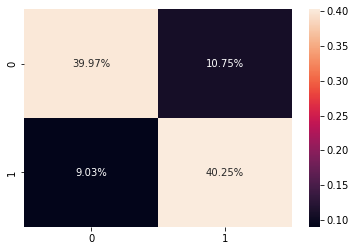

In [75]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt=".2%")